In [1]:
import pandas as pd
import os
file_name = "Stock_AnalysisQly_Details1.csv"
CSV_FILE = os.path.join(os.path.dirname(os.getcwd()), file_name)
print(CSV_FILE)
QSheet = pd.DataFrame.from_csv(CSV_FILE)

C:\Users\nandpara\PycharmProjects\Machine_Learning1\Stock_AnalysisQly_Details1.csv


c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


1.Linear Regression is applied to all stock , 
    Features = R_1_2_Parm_Pchg 
    Value = R_1_2_Close_Pchg
2.Taking A single Stock
    Feature = R_1_2, R_2_3, R_3_4, R_4_5 Param_Pchg
    Value = R_1_2_close_pchg
   

In [2]:
Stock_Feature = ['RQ_1_2_PAT_PChg','RQ_1_2_Operating_Profit_PChg','RQ_1_2_Total_Exp_PChg','RQ_1_2_Ebit_PChg','RQ_1_2_Ebitda_PChg']
Stock_value = ['RQ_1_2_Close_PChg']
train_Feature = QSheet[Stock_Feature][:-200]
train_Value = QSheet[Stock_value][:-200]
test_Feature = QSheet[Stock_Feature][-200:]
test_value = QSheet[Stock_value][-200:]

In [3]:
from sklearn.preprocessing import Imputer
import numpy as np
imputer = Imputer(strategy="median")
imputer.fit(QSheet)
imputer.statistics_
X = imputer.transform(QSheet)
NQSheet = pd.DataFrame(X, index=QSheet.index,columns=QSheet.columns)
#imputer now fills only the NaN values , inf value is still untreated....
NQSheet = NQSheet.replace(to_replace=[np.inf, -np.inf], value=0)

### DataFrame May have NaN, inf, -inf values, U should replace them as done above 

In [4]:
train_Feature = NQSheet[Stock_Feature][:-200]
train_Value = NQSheet[Stock_value][:-200]
test_Feature = NQSheet[Stock_Feature][-200:]
test_value = NQSheet[Stock_value][-200:]

In [5]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_Feature, train_Value)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(train_Feature, train_Value))

[-14.97348602]
[[-1.74171576e-05 -4.34421816e-04 -8.15764991e-04  4.26378034e-05
   8.61245245e-04]]
0.0030080524236668627


In [6]:
predict_values = linear.predict(test_Feature)
print (predict_values, test_value)

[[-14.92937647]
 [-15.00736057]
 [-14.96971527]
 [-14.97330195]
 [-14.95725464]
 [-14.98240916]
 [-14.96482412]
 [-14.97425786]
 [-14.93277392]
 [-15.02681436]
 [-14.96892184]
 [-14.96938481]
 [-14.97982315]
 [-15.05884202]
 [-14.97714244]
 [-14.97625356]
 [-14.96295128]
 [-14.98338978]
 [-14.99948363]
 [-14.96606503]
 [-14.96622745]
 [-14.93931689]
 [-14.99771607]
 [-52.19475989]
 [-15.0580963 ]
 [-14.97839332]
 [-14.96920913]
 [-15.15582332]
 [-14.94910636]
 [-16.03271684]
 [-14.98983377]
 [-14.95816664]
 [-14.92141324]
 [-14.97941301]
 [-14.94806141]
 [-15.00207549]
 [-14.91275051]
 [-14.97774438]
 [-14.97784756]
 [-15.16419002]
 [-15.00682589]
 [-14.97407032]
 [-14.96281379]
 [-14.96805135]
 [-14.94913383]
 [-14.96593926]
 [-14.97014735]
 [-15.2476894 ]
 [-14.98700025]
 [-15.01338416]
 [-14.97950866]
 [-15.01212905]
 [-14.98483786]
 [-14.95864145]
 [-12.87152916]
 [-14.98894725]
 [-14.84467872]
 [-14.98722908]
 [-14.94799924]
 [-15.01776947]
 [-14.93990575]
 [-14.9852812 ]
 [-14.83

In [7]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_value, predict_values)
print (lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

744.9977039109654
27.294646066783233


# So far the Train Dataset and Test Selected Radomnly and used for Prediction... 
	Till Last 200 is used for Train and Last 200 for Test... it does not sample well for each PCHG of Stocks...
    Next:
        Check for Best PCHG value to categorize the Stocks which can be used to stratify the Samples... 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241A8295F98>,
      dtype=object)

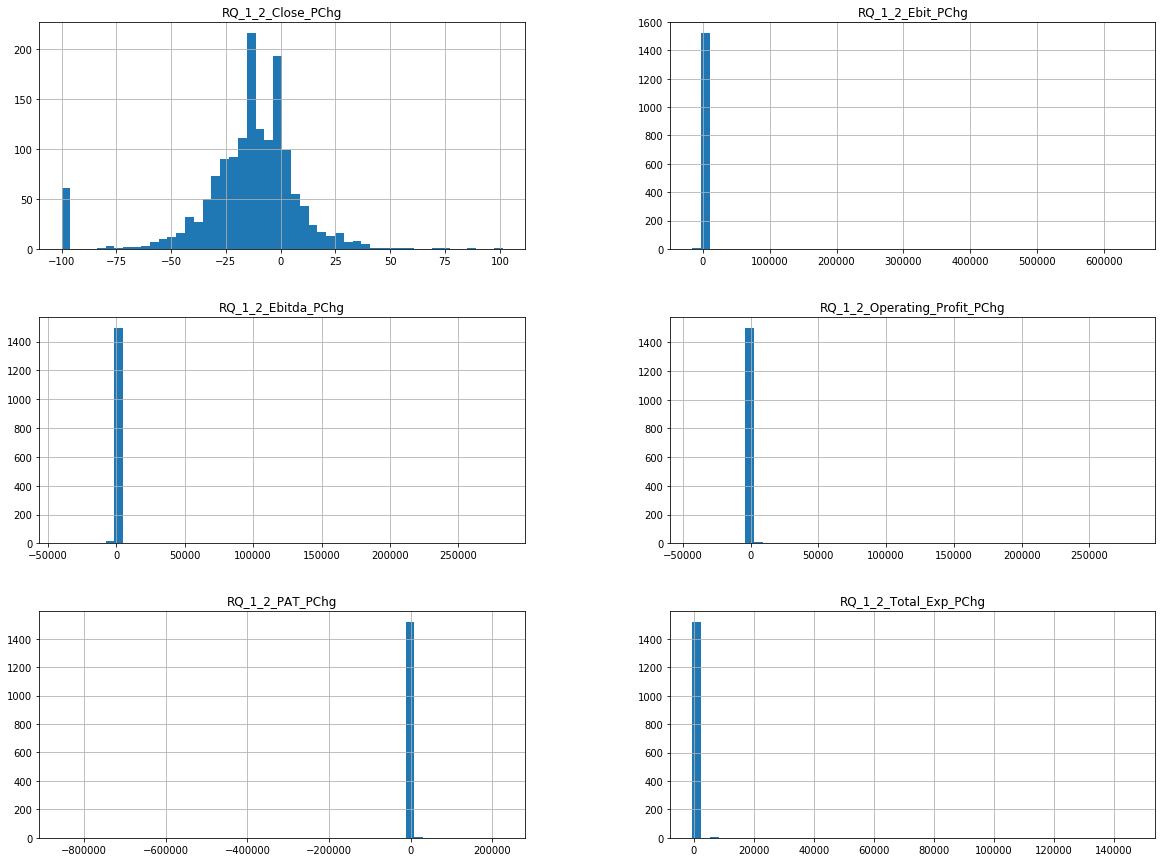

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
R_1_2_Cols = ['RQ_1_2_PAT_PChg','RQ_1_2_Operating_Profit_PChg','RQ_1_2_Total_Exp_PChg','RQ_1_2_Ebit_PChg','RQ_1_2_Ebitda_PChg','RQ_1_2_Close_PChg']
NQSheet[R_1_2_Cols].hist(bins=50, figsize=(20,15))


In [9]:
# NQSheet.plot(kind='scatter', x='RQ_1_2_PAT_PChg', y='RQ_1_2_Operating_Profit_PChg')

NQSheet['RQ_1_2_Operating_Profit_PChg'].head()

ELAND        917.857143
KDDL           7.635830
ERIS          16.488846
UNIONBANK    620.759119
MAANALU      106.730769
Name: RQ_1_2_Operating_Profit_PChg, dtype: float64

In [10]:
#['RQ_1_2_PAT_PChg','RQ_1_2_Operating_Profit_PChg','RQ_1_2_Total_Exp_PChg','RQ_1_2_Ebit_PChg','RQ_1_2_Ebitda_PChg']
R_Cols = ['RQ_1_2_OP_PCHG_Cat', 'RQ_1_2_TEx_PChg_Cat', 'RQ_1_2_Ebit_PChg_Cat', 'RQ_1_2_Ebitda_PChg_Cat']
NQSheet['RQ_1_2_OP_PCHG_Cat'] = np.ceil(NQSheet['RQ_1_2_Operating_Profit_PChg']/50)
NQSheet['RQ_1_2_TEx_PChg_Cat'] = np.ceil(NQSheet['RQ_1_2_Total_Exp_PChg']/50)
NQSheet['RQ_1_2_Ebit_PChg_Cat'] = np.ceil(NQSheet['RQ_1_2_Ebit_PChg']/50)
NQSheet['RQ_1_2_Ebitda_PChg_Cat'] = np.ceil(NQSheet['RQ_1_2_Ebitda_PChg']/50)
NQSheet[R_Cols].head()


,RQ_1_2_OP_PCHG_Cat,RQ_1_2_TEx_PChg_Cat,RQ_1_2_Ebit_PChg_Cat,RQ_1_2_Ebitda_PChg_Cat
ELAND,19.0,1.0,-45.0,-3.0
KDDL,1.0,1.0,1.0,1.0
ERIS,1.0,1.0,1.0,1.0
UNIONBANK,13.0,-0.0,1.0,4.0
MAANALU,3.0,-0.0,2.0,2.0


In [11]:
NQSheet['RQ_1_2_OP_PCHG_Cat'].where(NQSheet['RQ_1_2_Operating_Profit_PChg'] < 50, 50, inplace = True)
NQSheet['RQ_1_2_OP_PCHG_Cat'].where(NQSheet['RQ_1_2_Operating_Profit_PChg'] > -50, -50, inplace = True)
NQSheet['RQ_1_2_TEx_PChg_Cat'].where(NQSheet['RQ_1_2_Total_Exp_PChg'] < 50, 50, inplace = True)
NQSheet['RQ_1_2_TEx_PChg_Cat'].where(NQSheet['RQ_1_2_Total_Exp_PChg'] > -50, -50, inplace = True)
NQSheet['RQ_1_2_Ebit_PChg_Cat'].where(NQSheet['RQ_1_2_Ebit_PChg_Cat'] < 50, 50, inplace = True)
NQSheet['RQ_1_2_Ebit_PChg_Cat'].where(NQSheet['RQ_1_2_Ebit_PChg_Cat'] > -50, -50, inplace = True)
NQSheet['RQ_1_2_Ebitda_PChg_Cat'].where(NQSheet['RQ_1_2_Ebitda_PChg_Cat'] < 50, 50, inplace = True)
NQSheet['RQ_1_2_Ebitda_PChg_Cat'].where(NQSheet['RQ_1_2_Ebitda_PChg_Cat'] > -50, -50, inplace = True)

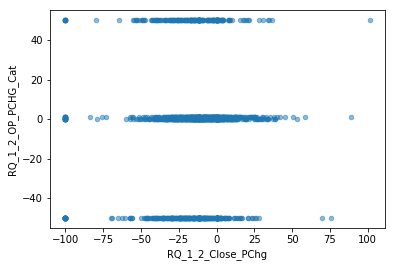

In [12]:
# NQSheet['RQ_1_2_OP_PCHG_Cat'].hist(bins=50, figsize=(20,15))
NQSheet.plot(kind='scatter', x='RQ_1_2_Close_PChg', y='RQ_1_2_OP_PCHG_Cat', alpha=0.5)


# Normalization - Feature Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ScaledQSheet = scaler.fit_transform(NQSheet[Stock_Feature + Stock_value])
ScaledQSheet = pd.DataFrame(ScaledQSheet,columns=[Stock_Feature + Stock_value])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241AA22BE48>,
      dtype=object)

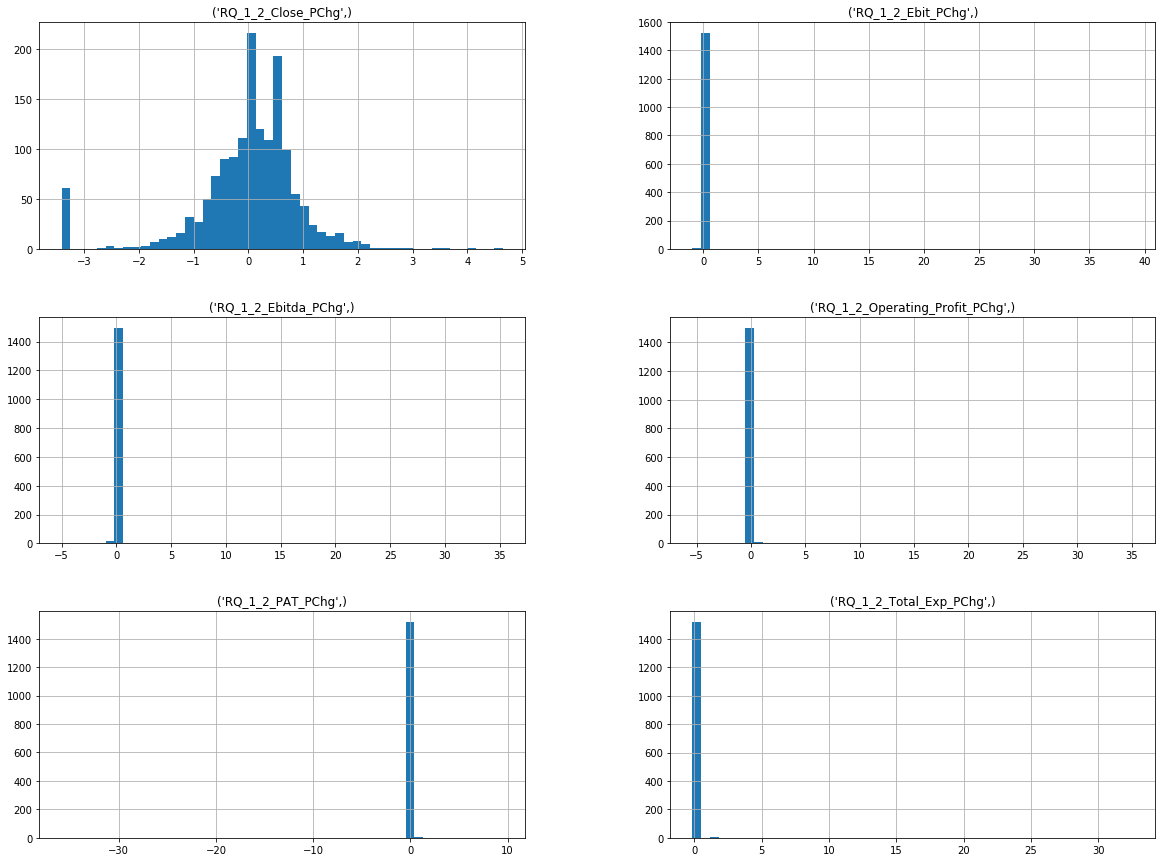

In [14]:
ScaledQSheet[Stock_Feature + Stock_value].hist(bins=50, figsize=(20,15))

In [15]:
# FivePercent = int(np.ceil(len(ScaledQSheet)*0.05))
# ScaledQSheet.sort_index(axis=1, ascending=False)
# ScaledQSheet= ScaledQSheet.reindex()
ScaledQSheet['RQ_1_2_Operating_Profit_PChg'].sortlevel()

c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  after removing the cwd from sys.path.


,RQ_1_2_Operating_Profit_PChg
0,0.080878
1,-0.032577
2,-0.031474
3,0.043846
4,-0.020226
5,-0.040685
6,-0.026220
7,-0.032202
8,-0.055622
9,-0.019371


In [16]:
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor()
TreeReg.fit(train_Feature, train_Value)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
TreeReg.score(train_Feature, train_Value)

0.9748858714601165

In [ ]:
TreeReg.predict()